**Ironhack Project-4 |** Data exploration

---

**Libraries**

In [1]:
# Data
import numpy as np
import pandas as pd

# SQL
import mysql.connector as msql
import sqlalchemy as alch
from getpass import getpass

# NLP
import nltk
import spacy

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import stylecloud

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (8,4)})
sns.set_style("whitegrid")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mplan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mplan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mplan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mplan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mplan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


---

**Data import**

In [2]:
# Importing data
got_script = pd.read_csv("../data/game_of_thrones_script.csv")
got_script.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.


**Exploring**

In [3]:
# Looking at data type of info and nan
got_script.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911 entries, 0 to 23910
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Release Date   23911 non-null  object
 1   Season         23911 non-null  object
 2   Episode        23911 non-null  object
 3   Episode Title  23911 non-null  object
 4   Name           23908 non-null  object
 5   Sentence       23911 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [4]:
# Some minor modifications:
got_script.dropna(inplace = True)
got_script['Name'] = got_script['Name'].str.title()

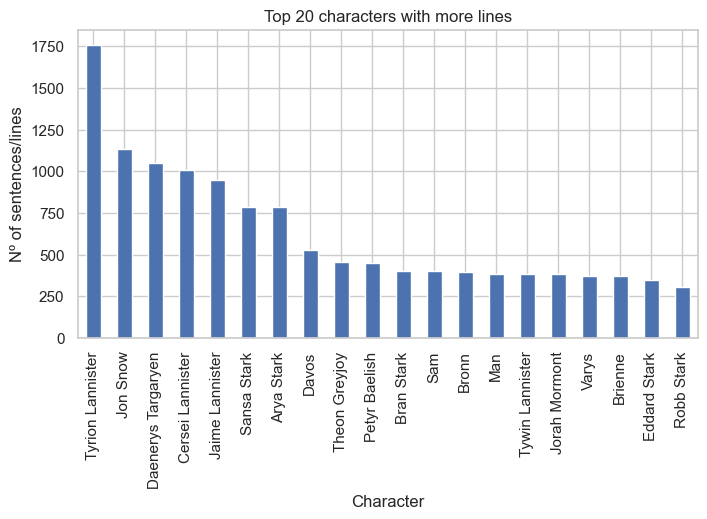

In [5]:
# Visualizing the top 10 characters with more lines in the whole series
got_script.groupby(['Name']).size().sort_values(ascending=False)[:20].plot.bar(
    title = "Top 20 characters with more lines",
    xlabel = "Character",
    ylabel = "Nº of sentences/lines");

In [6]:
got_script = got_script.reset_index()

In [19]:
# Export
# got_script.to_csv("../data/got_script.csv", index = False)

---

In [7]:
# Calculating sentiment score 
sid = SentimentIntensityAnalyzer()
got_script[['neg', 'neu', 'pos', 'compound']] = got_script['Sentence'].apply(sid.polarity_scores).apply(pd.Series)
got_script

,index,Release Date,Season,Episode,Episode Title,Name,Sentence,neg,neu,pos,compound
0,0,2011-04-17,Season 1,Episode 1,Winter is Coming,Waymar Royce,What do you expect? They're savages. One lot s...,0.233,0.767,0.000,-0.7717
1,1,2011-04-17,Season 1,Episode 1,Winter is Coming,Will,I've never seen wildlings do a thing like this...,0.000,0.773,0.227,0.6124
2,2,2011-04-17,Season 1,Episode 1,Winter is Coming,Waymar Royce,How close did you get?,0.000,1.000,0.000,0.0000
3,3,2011-04-17,Season 1,Episode 1,Winter is Coming,Will,Close as any man would.,0.000,1.000,0.000,0.0000
4,4,2011-04-17,Season 1,Episode 1,Winter is Coming,Gared,We should head back to the wall.,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
23903,23906,2019-05-19,Season 8,Episode 6,The Iron Throne,Brienne,I think we can all agree that ships take prece...,0.000,0.800,0.200,0.3612
23904,23907,2019-05-19,Season 8,Episode 6,The Iron Throne,Bronn,I think that's a very presumptuous statement.,0.000,1.000,0.000,0.0000
23905,23908,2019-05-19,Season 8,Episode 6,The Iron Throne,Tyrion Lannister,I once brought a jackass and a honeycomb into ...,0.318,0.682,0.000,-0.4215
23906,23909,2019-05-19,Season 8,Episode 6,The Iron Throne,Man,The Queen in the North!,0.000,1.000,0.000,0.0000


In [55]:
got_script.groupby(['Season', 'Episode'])['compound'].mean().sort_values()

Season    Episode  
Season 7  Episode 7   -0.066983
Season 4  Episode 8   -0.053705
Season 6  Episode 7   -0.042842
          Episode 9   -0.037350
Season 3  Episode 4   -0.037013
                         ...   
Season 5  Episode 7    0.049236
Season 8  Episode 4    0.050529
Season 6  Episode 3    0.052869
          Episode 5    0.063241
Season 5  Episode 9    0.066596
Name: compound, Length: 73, dtype: float64

In [10]:
got_script.groupby('Name')['compound'].mean().sort_values().head(50)

Name
Ranger                -0.983100
Lollys Stokeworth     -0.895900
Greizhen              -0.848100
Braavosi Man          -0.840200
Male Singer           -0.824800
Alliser Throne        -0.817250
Othell Yarwick        -0.726900
Aerson                -0.726900
Nights Watchmen       -0.680000
Assassin              -0.612400
Myrcella Baratheon    -0.599400
Morag                 -0.562650
Group                 -0.557400
Listeners             -0.557400
Silk King             -0.526700
Drogon                -0.520275
Wildling Elder        -0.510600
Kraznys Mo Nakloz     -0.461825
Ollys Mother          -0.455900
Master Of Arms        -0.405500
Rorge                 -0.386711
Waymar Royce          -0.385850
Old Nan               -0.370560
Allister              -0.361200
Nights Watch          -0.359500
Leo Lefford           -0.335250
Officer               -0.318200
Robett Glover         -0.318200
Bolton Bannerman      -0.296000
Timett                -0.296000
Bowen Marsh           -0.292400
Kin

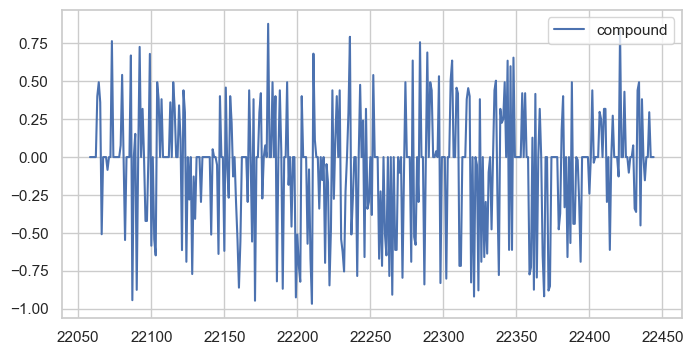

In [56]:
# Most negative
filter_s = got_script['Season'] == 'Season 7'
filter_ep = got_script['Episode'] == 'Episode 7'
got_script[filter_s & filter_ep].plot(y='compound', use_index=True);

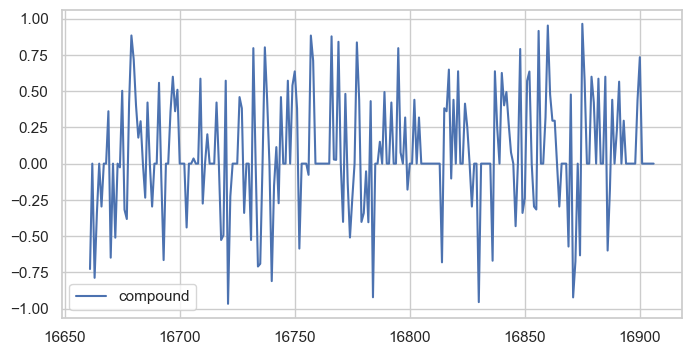

In [57]:
# Most positive
filter_s = got_script['Season'] == 'Season 5'
filter_ep = got_script['Episode'] == 'Episode 9'
got_script[filter_s & filter_ep].plot(y='compound', use_index=True);

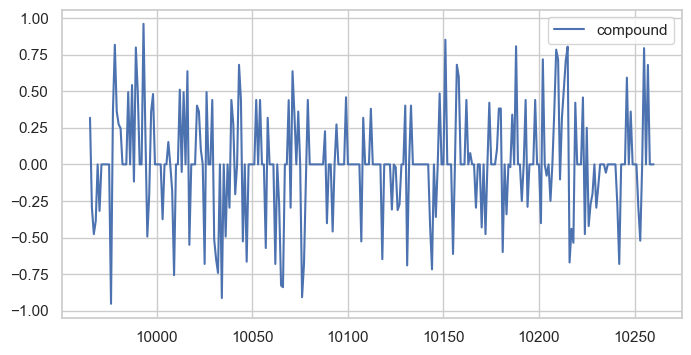

In [58]:
# Red wedding
filter_s = got_script['Season'] == 'Season 3'
filter_ep = got_script['Episode'] == 'Episode 9'
got_script[filter_s & filter_ep].plot(y='compound', use_index=True);

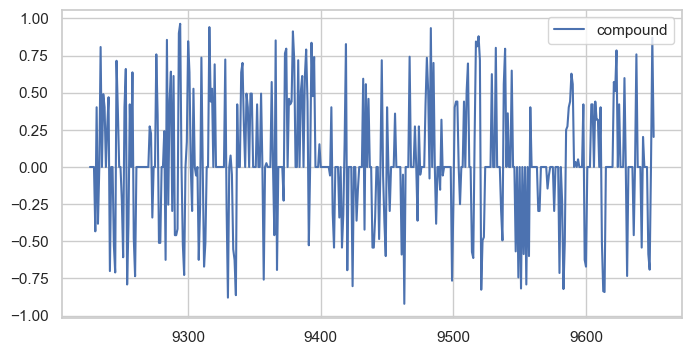

In [59]:
# Ramsay tortures Theon
filter_s = got_script['Season'] == 'Season 3'
filter_ep = got_script['Episode'] == 'Episode 7'
got_script[filter_s & filter_ep].plot(y='compound', use_index=True);

In [ ]:
got_script[got_script['Name'] == 'Petyr Baelish'].plot(y='compound', use_index=True);

In [61]:
# Filtering out non-top characters
got_top = got_script.groupby(['Name']).size().sort_values(ascending=False)[:20]
got_top_characters = got_top.index.values
got_top_sentiment = got_script[got_script['Name'].isin(got_top_characters)]

In [62]:
# Calculating sentiment score
sid = SentimentIntensityAnalyzer()
got_top_sentiment[['neg', 'neu', 'pos', 'compound']] = got_top_sentiment['Sentence'].apply(sid.polarity_scores).apply(pd.Series)
got_top_sentiment

C:\Users\mplan\AppData\Local\Temp\ipykernel_12428\722818529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  got_top_sentiment[['neg', 'neu', 'pos', 'compound']] = got_top_sentiment['Sentence'].apply(sid.polarity_scores).apply(pd.Series)


,Release Date,Season,Episode,Episode Title,Name,Sentence,neg,neu,pos,compound
15,2011-04-17,Season 1,Episode 1,Winter is Coming,Jon Snow,Go on. Father's watching.,0.000,1.000,0.000,0.0000
16,2011-04-17,Season 1,Episode 1,Winter is Coming,Jon Snow,And your mother.,0.000,1.000,0.000,0.0000
18,2011-04-17,Season 1,Episode 1,Winter is Coming,Sansa Stark,Thank you.,0.000,0.286,0.714,0.3612
20,2011-04-17,Season 1,Episode 1,Winter is Coming,Eddard Stark,And which one of you was a marksman at ten? Ke...,0.000,1.000,0.000,0.0000
21,2011-04-17,Season 1,Episode 1,Winter is Coming,Jon Snow,"Don't think too much, Bran.",0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...
23905,2019-05-19,Season 8,Episode 6,The Iron Throne,Bronn,"Well, I imagine he isn't using them properly.",0.000,0.741,0.259,0.2732
23906,2019-05-19,Season 8,Episode 6,The Iron Throne,Brienne,I think we can all agree that ships take prece...,0.000,0.800,0.200,0.3612
23907,2019-05-19,Season 8,Episode 6,The Iron Throne,Bronn,I think that's a very presumptuous statement.,0.000,1.000,0.000,0.0000
23908,2019-05-19,Season 8,Episode 6,The Iron Throne,Tyrion Lannister,I once brought a jackass and a honeycomb into ...,0.318,0.682,0.000,-0.4215


In [63]:
got_top_sentiment.groupby('Name')['compound'].mean().sort_values()

Name
Arya Stark           -0.043513
Theon Greyjoy        -0.041483
Bran Stark           -0.021742
Man                  -0.020288
Robb Stark           -0.016686
Jon Snow             -0.011449
Jaime Lannister      -0.004060
Tywin Lannister      -0.001452
Bronn                 0.008417
Cersei Lannister      0.009894
Jorah Mormont         0.010693
Sansa Stark           0.012982
Daenerys Targaryen    0.021455
Brienne               0.023218
Eddard Stark          0.028003
Tyrion Lannister      0.030869
Sam                   0.034549
Davos                 0.050375
Varys                 0.082346
Petyr Baelish         0.083612
Name: compound, dtype: float64

In [64]:
# Set of stop words
stop_words = set(stopwords.words('english'))

# Tokenize words of each sentence
word_tokens = word_tokenize(got_script.iloc[0]['Sentence'])

# Get words not present in stop words set
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

# Remove symbols
symbols = ['?', '!', ',', '.']
filtered_sentence = [w for w in filtered_sentence if not w.lower() in symbols]

print(word_tokens)
print(filtered_sentence)

['What', 'do', 'you', 'expect', '?', 'They', "'re", 'savages', '.', 'One', 'lot', 'steals', 'a', 'goat', 'from', 'another', 'lot', 'and', 'before', 'you', 'know', 'it', ',', 'they', "'re", 'ripping', 'each', 'other', 'to', 'pieces', '.']
['expect', "'re", 'savages', 'One', 'lot', 'steals', 'goat', 'another', 'lot', 'know', "'re", 'ripping', 'pieces']


In [65]:
def filter_stopwords (sentence):
    
    # Set of stop words
    stop_words = set(stopwords.words('english'))

    # Tokenize words of each sentence
    word_tokens = word_tokenize(sentence)

    # Get words not present in stop words set
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

    # Remove symbols
    symbols = ['?', '!', ',', '.']
    filtered_sentence = [w for w in filtered_sentence if not w.lower() in symbols]

    return " ".join(filtered_sentence)

In [66]:
got_script['Sentence'] = got_script['Sentence'].apply(lambda x: filter_stopwords(x))
got_script

,Release Date,Season,Episode,Episode Title,Name,Sentence,neg,neu,pos,compound
0,2011-04-17,Season 1,Episode 1,Winter is Coming,Waymar Royce,expect 're savages One lot steals goat another...,0.233,0.767,0.000,-0.7717
1,2011-04-17,Season 1,Episode 1,Winter is Coming,Will,'ve never seen wildlings thing like 've never ...,0.000,0.773,0.227,0.6124
2,2011-04-17,Season 1,Episode 1,Winter is Coming,Waymar Royce,close get,0.000,1.000,0.000,0.0000
3,2011-04-17,Season 1,Episode 1,Winter is Coming,Will,Close man would,0.000,1.000,0.000,0.0000
4,2011-04-17,Season 1,Episode 1,Winter is Coming,Gared,head back wall,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...
23906,2019-05-19,Season 8,Episode 6,The Iron Throne,Brienne,think agree ships take precedence brothels,0.000,0.800,0.200,0.3612
23907,2019-05-19,Season 8,Episode 6,The Iron Throne,Bronn,think 's presumptuous statement,0.000,1.000,0.000,0.0000
23908,2019-05-19,Season 8,Episode 6,The Iron Throne,Tyrion Lannister,brought jackass honeycomb brothel,0.318,0.682,0.000,-0.4215
23909,2019-05-19,Season 8,Episode 6,The Iron Throne,Man,Queen North,0.000,1.000,0.000,0.0000


In [67]:
got_script[['neg2', 'neu2', 'pos2', 'compound2']] = got_script['Sentence'].apply(sid.polarity_scores).apply(pd.Series)
got_script

,Release Date,Season,Episode,Episode Title,Name,Sentence,neg,neu,pos,compound,neg2,neu2,pos2,compound2
0,2011-04-17,Season 1,Episode 1,Winter is Coming,Waymar Royce,expect 're savages One lot steals goat another...,0.233,0.767,0.000,-0.7717,0.379,0.621,0.000,-0.7717
1,2011-04-17,Season 1,Episode 1,Winter is Coming,Will,'ve never seen wildlings thing like 've never ...,0.000,0.773,0.227,0.6124,0.000,0.688,0.312,0.6124
2,2011-04-17,Season 1,Episode 1,Winter is Coming,Waymar Royce,close get,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000
3,2011-04-17,Season 1,Episode 1,Winter is Coming,Will,Close man would,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000
4,2011-04-17,Season 1,Episode 1,Winter is Coming,Gared,head back wall,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23906,2019-05-19,Season 8,Episode 6,The Iron Throne,Brienne,think agree ships take precedence brothels,0.000,0.800,0.200,0.3612,0.000,0.667,0.333,0.3612
23907,2019-05-19,Season 8,Episode 6,The Iron Throne,Bronn,think 's presumptuous statement,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000
23908,2019-05-19,Season 8,Episode 6,The Iron Throne,Tyrion Lannister,brought jackass honeycomb brothel,0.318,0.682,0.000,-0.4215,0.483,0.517,0.000,-0.4215
23909,2019-05-19,Season 8,Episode 6,The Iron Throne,Man,Queen North,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000


In [68]:
got_script.groupby(['Season', 'Episode'])['compound2'].mean().sort_values()

Season    Episode  
Season 4  Episode 8   -0.037140
Season 7  Episode 7   -0.034102
Season 6  Episode 2   -0.030899
Season 3  Episode 4   -0.022377
Season 7  Episode 6   -0.021913
                         ...   
Season 5  Episode 9    0.073637
          Episode 7    0.073767
Season 6  Episode 3    0.078443
Season 5  Episode 3    0.081980
Season 6  Episode 5    0.085264
Name: compound2, Length: 73, dtype: float64

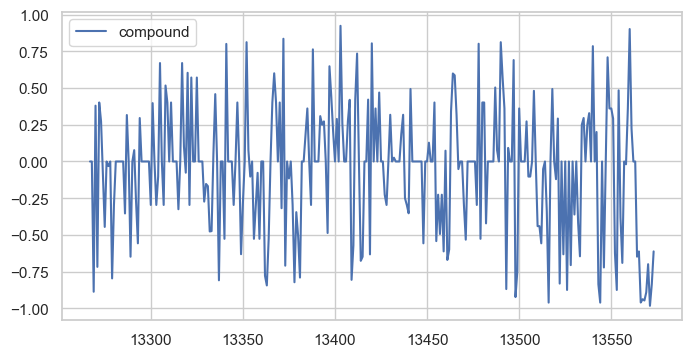

In [69]:
# Most negative
filter_s = got_script['Season'] == 'Season 4'
filter_ep = got_script['Episode'] == 'Episode 8'
got_script[filter_s & filter_ep].plot(y='compound', use_index=True);

In [70]:
got_script.iloc[13550:13600]

,Release Date,Season,Episode,Episode Title,Name,Sentence,neg,neu,pos,compound,neg2,neu2,pos2,compound2
13550,2014-06-01,Season 4,Episode 8,The Mountain and the Viper,Oberyn Martell,like move around,0.000,0.545,0.455,0.3612,0.000,0.444,0.556,0.3612
13551,2014-06-01,Season 4,Episode 8,The Mountain and the Viper,Tyrion Lannister,could least wear helmet n't drink fight,0.000,0.821,0.179,0.2924,0.000,0.733,0.267,0.2924
13552,2014-06-01,Season 4,Episode 8,The Mountain and the Viper,Oberyn Martell,learn years fighting pits always drink fight,0.298,0.702,0.000,-0.6249,0.505,0.495,0.000,-0.6249
13553,2014-06-01,Season 4,Episode 8,The Mountain and the Viper,Tyrion Lannister,could get killed could get killed,0.529,0.471,0.000,-0.8750,0.692,0.308,0.000,-0.8750
13554,2014-06-01,Season 4,Episode 8,The Mountain and the Viper,Oberyn Martell,Today day die,0.000,0.614,0.386,0.4847,0.661,0.339,0.000,-0.5994
13555,2014-06-01,Season 4,Episode 8,The Mountain and the Viper,Ellaria,'re going fight,0.394,0.606,0.000,-0.3818,0.565,0.435,0.000,-0.3818
13556,2014-06-01,Season 4,Episode 8,The Mountain and the Viper,Oberyn Martell,'m going kill,0.540,0.460,0.000,-0.6908,0.701,0.299,0.000,-0.6908
13557,2014-06-01,Season 4,Episode 8,The Mountain and the Viper,Ellaria,biggest man 've ever seen,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000
13558,2014-06-01,Season 4,Episode 8,The Mountain and the Viper,Oberyn Martell,Size matter flat back,0.097,0.903,0.000,-0.0191,0.000,0.732,0.268,0.0258
13559,2014-06-01,Season 4,Episode 8,The Mountain and the Viper,Tyrion Lannister,Thank gods,0.000,0.444,0.556,0.3612,0.000,0.286,0.714,0.3612


In [71]:
nlp = spacy.load("en_core_web_sm")

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.